In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df_m = pd.read_csv('data/speeddating modified.csv')
df_p = pd.read_csv('data/speeddating personal.csv')

In [3]:
df2 = df_p[['attractive','nb_match_moyen']].groupby('attractive').mean()
df3 = df_p[['intelligence','nb_match_moyen']].groupby('intelligence').mean()
df4 = df_p[['sincere','nb_match_moyen']].groupby('sincere').mean()
df5 = df_p[['funny','nb_match_moyen']].groupby('funny').mean()
df6 = df_p[['ambition','nb_match_moyen']].groupby('ambition').mean()

In [4]:
df_m['diff_note_moy'] = df_m['note_moyenne_o'] - df_m['note_moyenne']

In [5]:
df_m

,Unnamed: 0,id,has_null,wave,gender,age,age_o,d_age,d_d_age,race,...,guess_prob_liked,d_like,d_guess_prob_liked,met,decision,decision_o,match,note_moyenne,note_moyenne_o,diff_note_moy
0,0,0,0,1,female,21.0,27.0,6,[4-6],asian/pacific islander/asian-american,...,6.0,[6-8],[5-6],0.0,1,0,0,5.79,6.90,1.11
1,1,0,0,1,female,21.0,22.0,1,[0-1],asian/pacific islander/asian-american,...,5.0,[6-8],[5-6],1.0,1,0,0,5.79,7.00,1.21
2,2,0,1,1,female,21.0,22.0,1,[0-1],asian/pacific islander/asian-american,...,NaN,[6-8],[0-4],1.0,1,1,1,5.79,8.80,3.01
3,3,0,0,1,female,21.0,23.0,2,[2-3],asian/pacific islander/asian-american,...,6.0,[6-8],[5-6],0.0,1,1,1,5.79,7.50,1.71
4,4,0,0,1,female,21.0,24.0,3,[2-3],asian/pacific islander/asian-american,...,6.0,[6-8],[5-6],0.0,1,1,1,5.79,6.40,0.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8204,8204,537,1,21,male,25.0,26.0,1,[0-1],european/caucasian-american,...,5.0,[0-5],[5-6],0.0,0,1,0,6.99,3.40,-3.59
8205,8205,537,1,21,male,25.0,24.0,1,[0-1],european/caucasian-american,...,4.0,[0-5],[0-4],0.0,0,0,0,6.99,5.15,-1.84
8206,8206,537,1,21,male,25.0,29.0,4,[4-6],european/caucasian-american,...,5.0,[6-8],[5-6],0.0,0,0,0,6.99,1.90,-5.09
8207,8207,537,1,21,male,25.0,22.0,3,[2-3],european/caucasian-american,...,5.0,[0-5],[5-6],0.0,0,1,0,6.99,4.30,-2.69


In [6]:
df_3 = df_m[['diff_note_moy', 'match']].groupby(df_m['diff_note_moy'].round(1)).mean()

In [7]:
df_3 = df_3[df_3['diff_note_moy']< 3]
df_3 = df_3[df_3['diff_note_moy']> -4]
#je coupe encore les valeurs extrêmales, pas représentatives

<AxesSubplot: xlabel="Différence entre la note attribuée par l'autre personne et celle auto-attribuée", ylabel='Probabilité de match'>

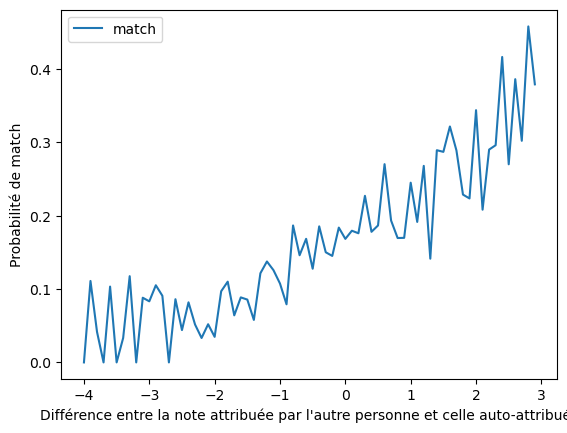

In [8]:
df_3.plot(y = 'match', xlabel = "Différence entre la note attribuée par l'autre personne et celle auto-attribuée", ylabel = 'Probabilité de match')

In [18]:
#Résultat intéressant et moins évident qu'il peux sembler : si je me met une note de 9 et que la fille dit que je suis un 8, certes elle m'a noté très haut, ce qui prédis un match
# mais la différence entre les notes est -1 et on voit ici que la proba de match est de 0.1. Il y a l'air d'y avoir une vrai correlation qui indique que les personnes plus modestes
# ont plus de chance de match que les personnes avec un ego